In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

In [4]:
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Most Number of Man of the Matches across all season

In [187]:
mom_seasons = pd.DataFrame(data.groupby(['player_of_match']).size())
mom_seasons.reset_index(inplace = True)
mom_seasons.columns = ['Player Name','Number of Man of the Matches']
mom_seasons.sort_values(by = ['Number of Man of the Matches'],ascending = False,inplace = True)
mom_seasons.reset_index(inplace = True)
mom_seasons.head()

,index,Player Name,Number of Man of the Matches
0,34,CH Gayle,20
1,9,AB de Villiers,18
2,158,RG Sharma,16
3,210,YK Pathan,16
4,41,DA Warner,15


In [93]:
print('Number of Players who received Man of the Matches: '+ str(len(mom_seasons)))

Number of Players who received Man of the Matches: 214


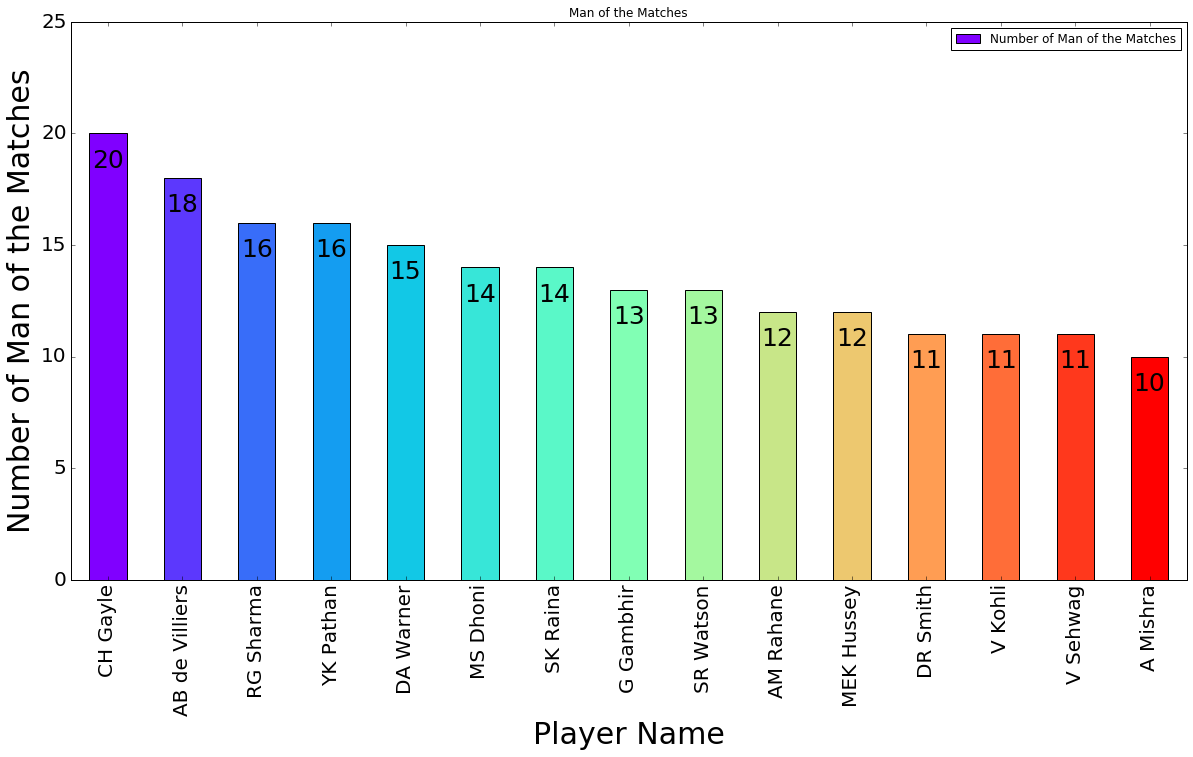

In [186]:
colors = cm.rainbow(np.linspace(0,1,15))
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure(figsize = (100,100))
mom_seasons.iloc[0:15].plot(x = 'Player Name',y = 'Number of Man of the Matches',kind = 'bar',color = colors,fontsize = 20)
plt.xlabel('Player Name',fontsize = 30)
plt.ylabel('Number of Man of the Matches',fontsize = 30)
plt.title('Man of the Matches')
for x in range(15):
    plt.text(0+x,mom_seasons.iloc[x,2]-1.2,mom_seasons.iloc[x,2],fontsize = 25,color = 'black',
            horizontalalignment = 'center',verticalalignment = 'center')
plt.ylim([0,25])
plt.show()

 A thing to notice here is that most of the players are batsmen and generally are in the top 3 for their team. This tells us about how often the game is dominated by the batsmen seeing we only have one bowler in the above list i.e. 'A Mishra'

# Divided by season

Now we will look for the seasons which was dominated by few of the players.

In [230]:
mom_every_season = pd.DataFrame(data.groupby(['season','player_of_match']).size())
mom_every_season.columns = ['Number of Man of the Match']
mom_every_season = mom_every_season[mom_every_season['Number of Man of the Match'] >= 4]
mom_every_season.reset_index(inplace = True)
mom_every_season.sort_values(by = ['season','player_of_match'],ascending = False)
mom_every_season.set_index(['season','player_of_match'],inplace = True) 
mom_every_season

Number of Man of the Match
season player_of_match                            
2008   SE Marsh                                  5
       SR Watson                                 4
       YK Pathan                                 4
2010   SR Tendulkar                              4
2011   CH Gayle                                  6
2012   CH Gayle                                  5
2013   A Mishra                                  4
       MEK Hussey                                5
2014   GJ Maxwell                                4
2015   DA Warner                                 4
2016   AB de Villiers                            4
       RG Sharma                                 4
       V Kohli                                   5
2018   Rashid Khan                               4

This shows which players dominated the seasons.

## Top 5 Players with most Awards each Season

In [260]:
every_season['Number of Man of the Matches'] = every_season['Number of Man of the Matches'].astype(int)
every_season = pd.DataFrame(data.groupby(['season','player_of_match']).size())
every_season.reset_index(inplace = True)
every_season.columns = ['Season','Player Name','Number of Man of the Matches']
every_season.sort_values(by = ['Season','Number of Man of the Matches'],ascending = False,inplace = True)
every_season

#Required Dataset

,Season,Player Name,Number of Man of the Matches
463,2018,Rashid Khan,4
436,2018,AB de Villiers,3
450,2018,JC Buttler,3
466,2018,SP Narine,3
467,2018,SR Watson,3
438,2018,AS Rajpoot,2
440,2018,AT Rayudu,2
442,2018,CA Lynn,2
443,2018,CH Gayle,2
453,2018,KL Rahul,2


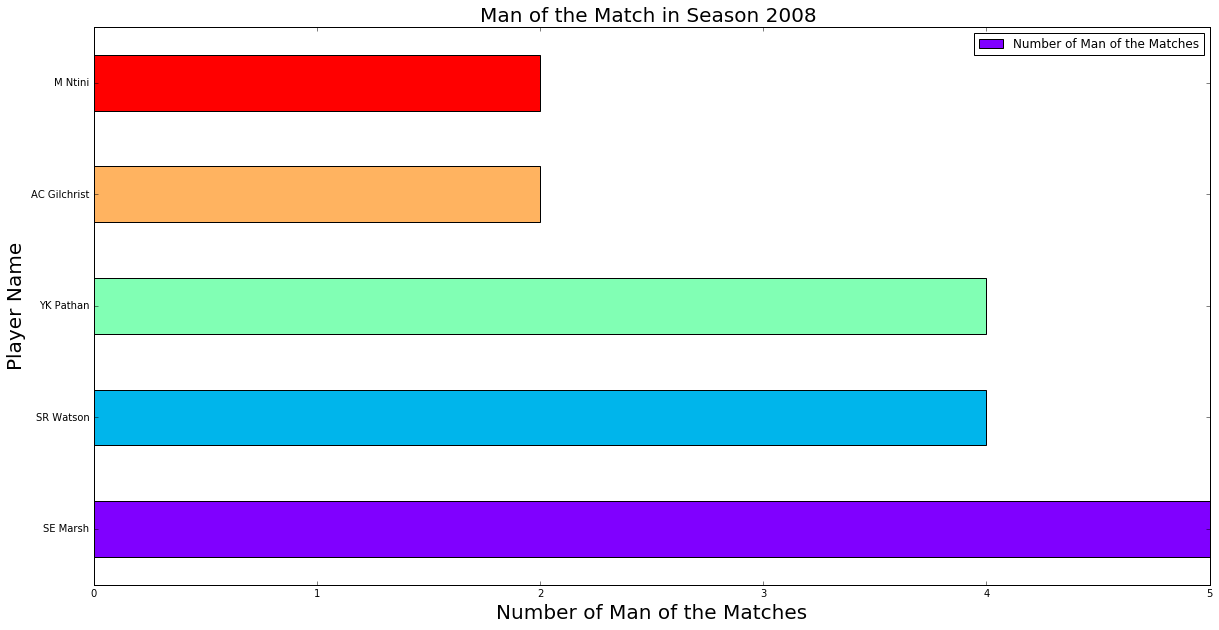

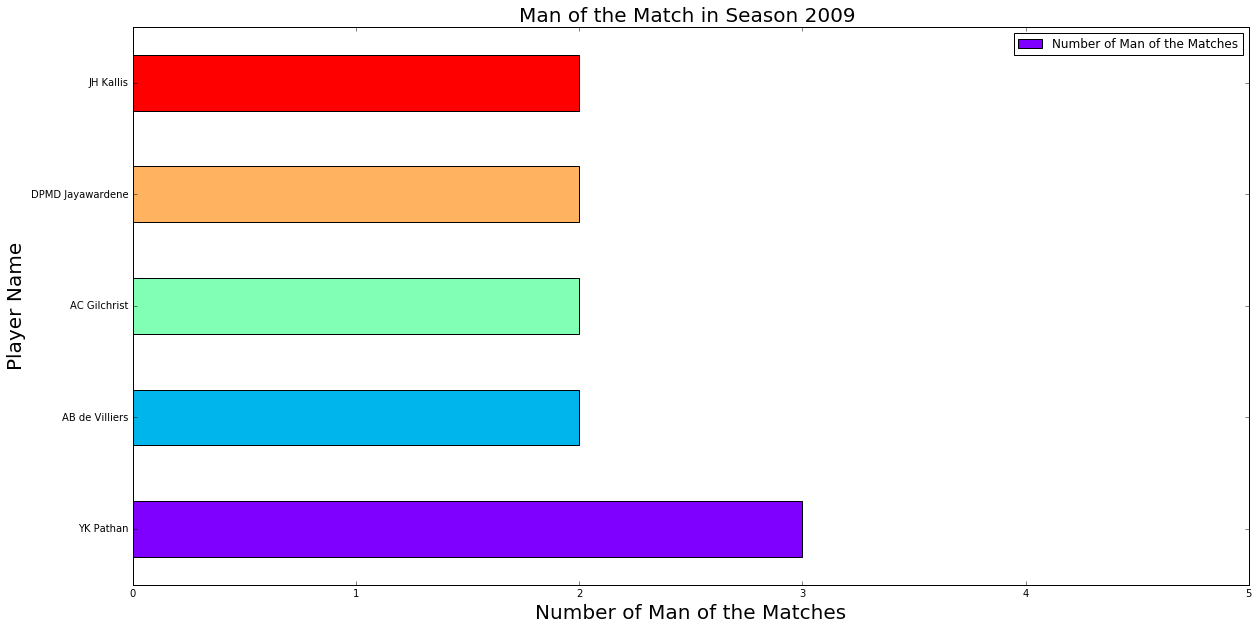

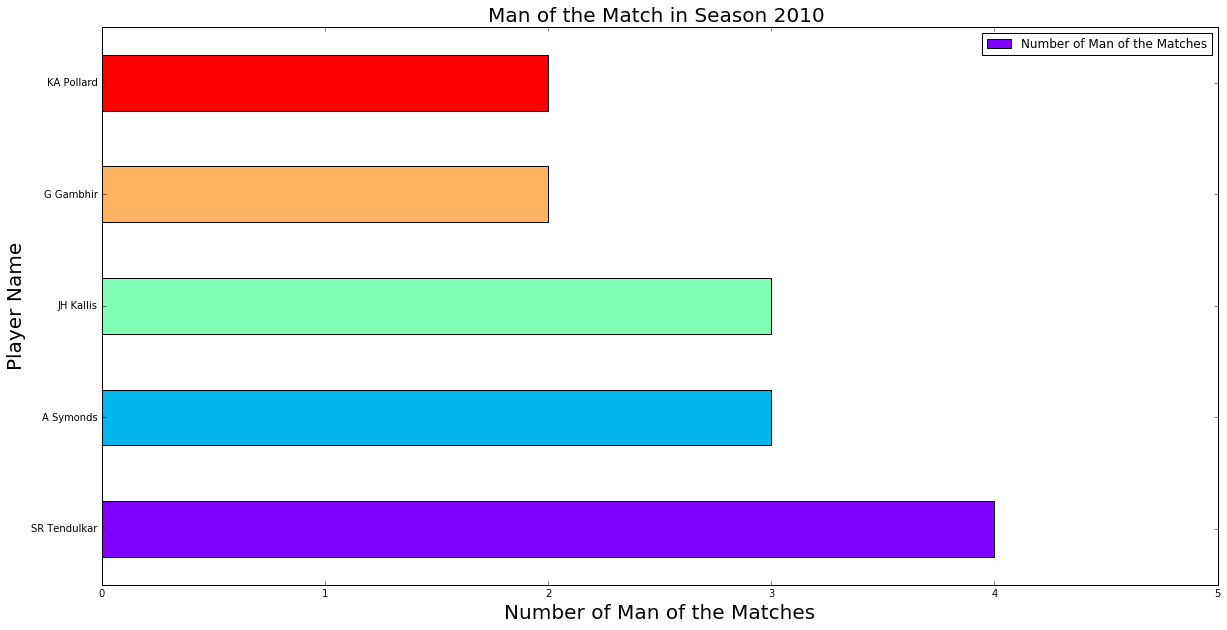

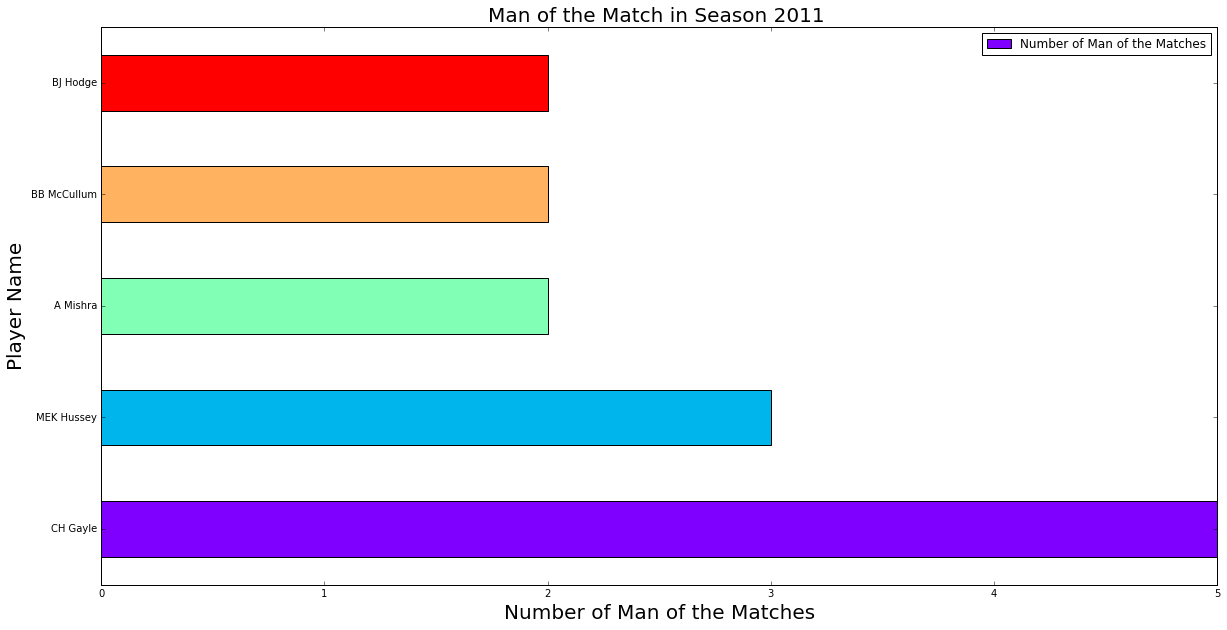

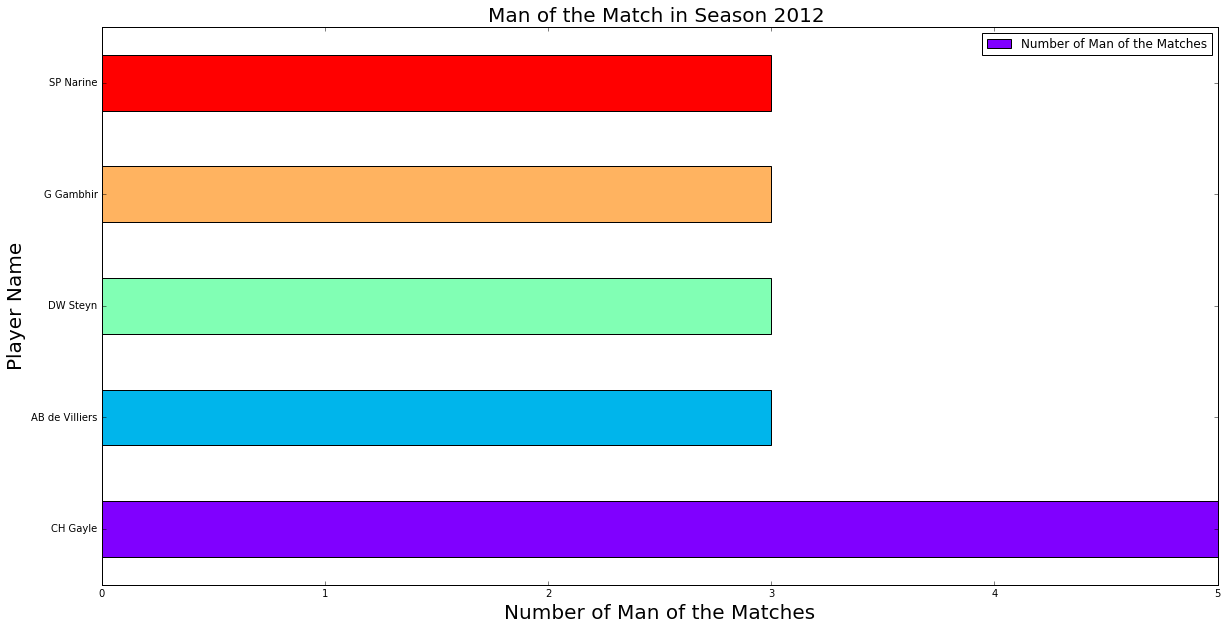

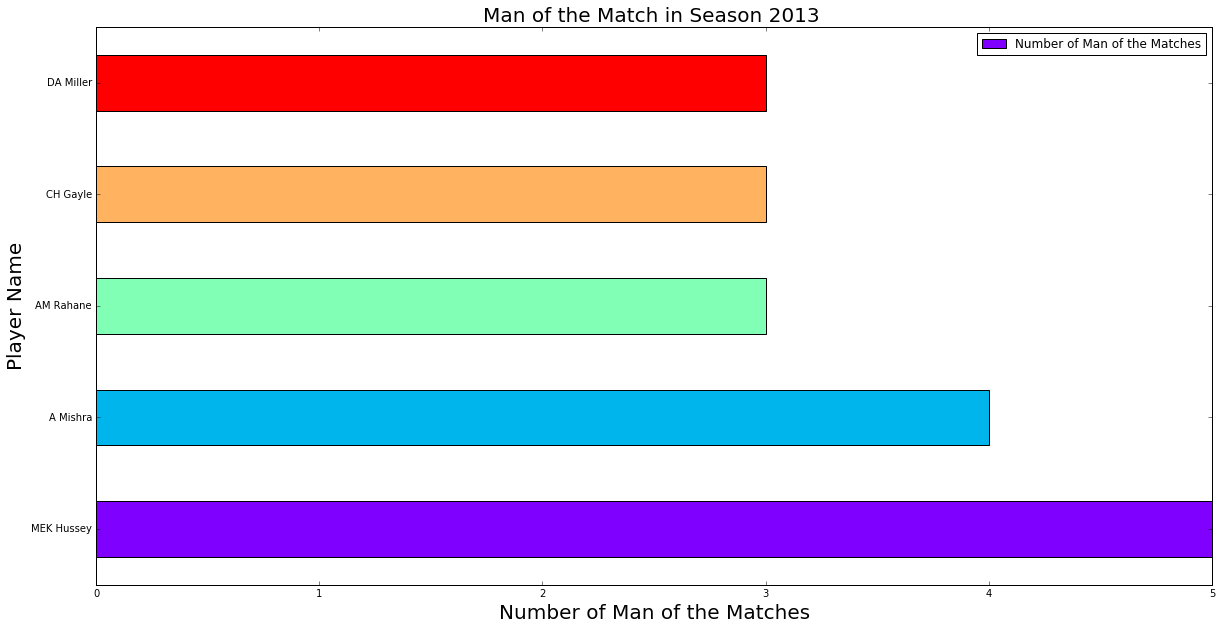

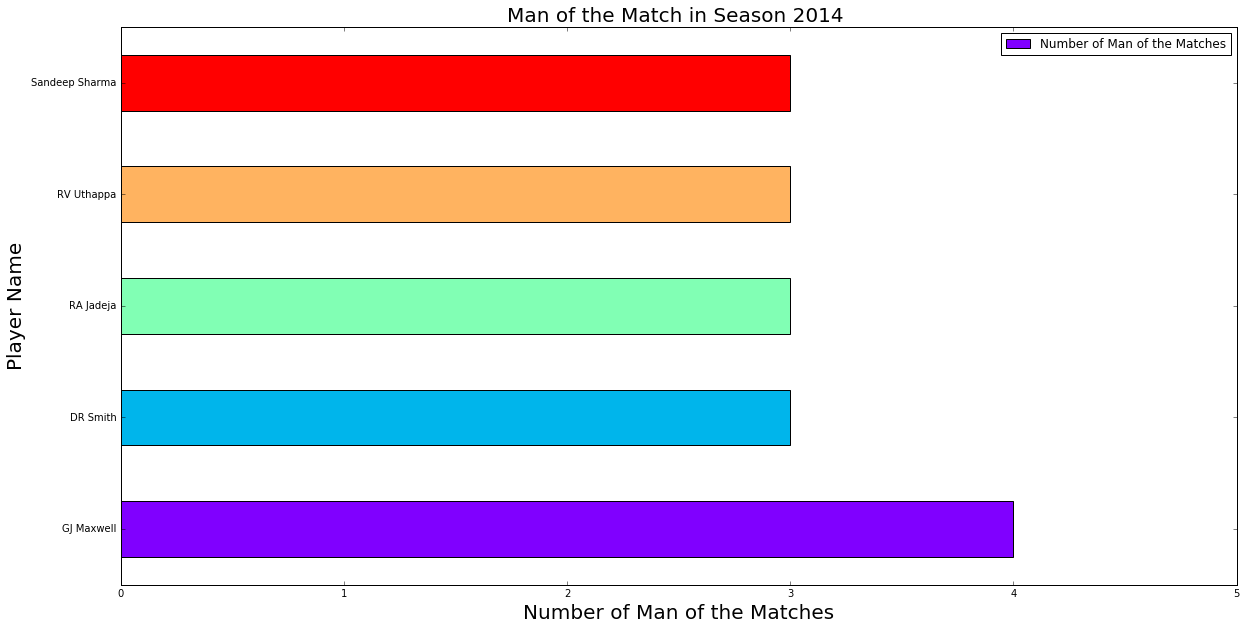

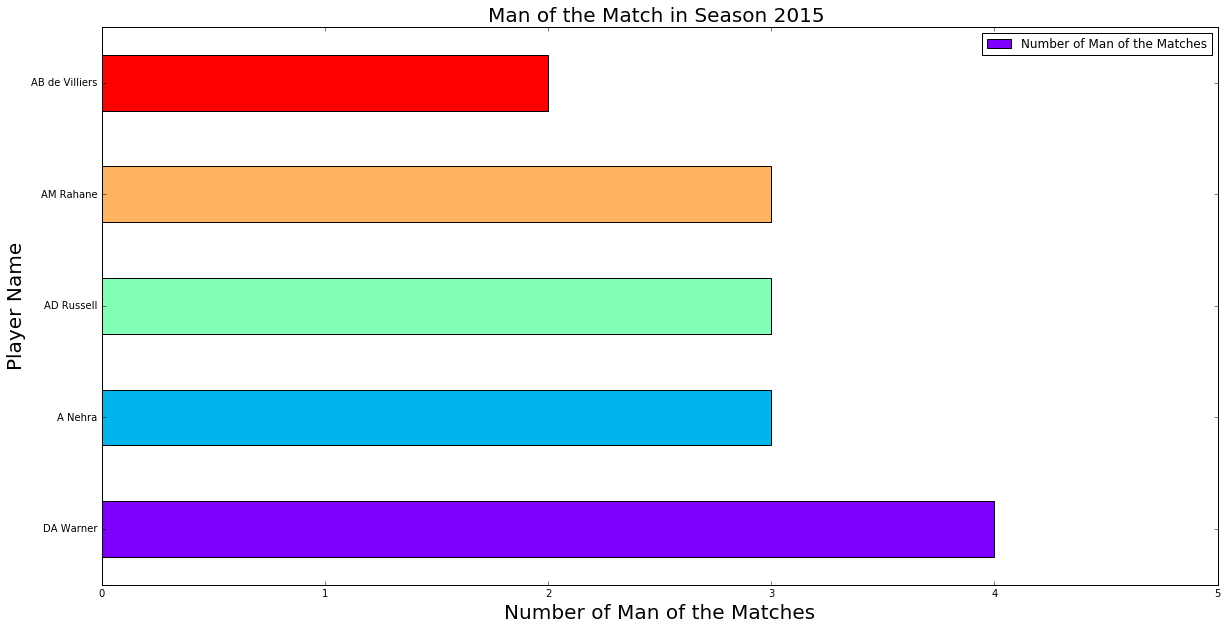

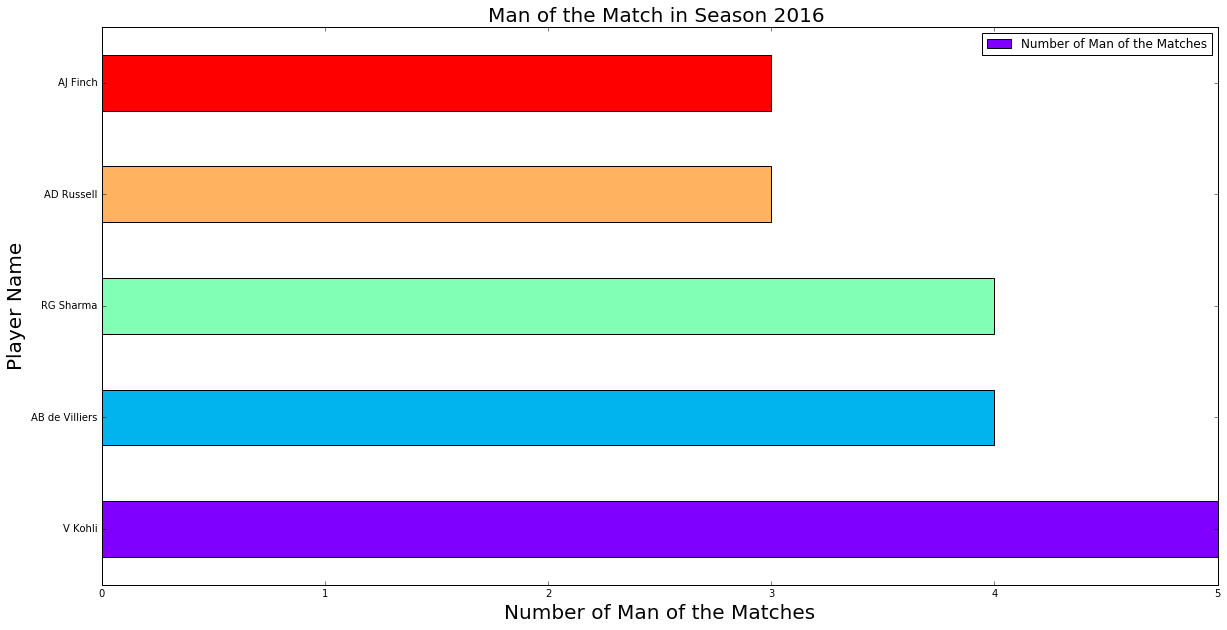

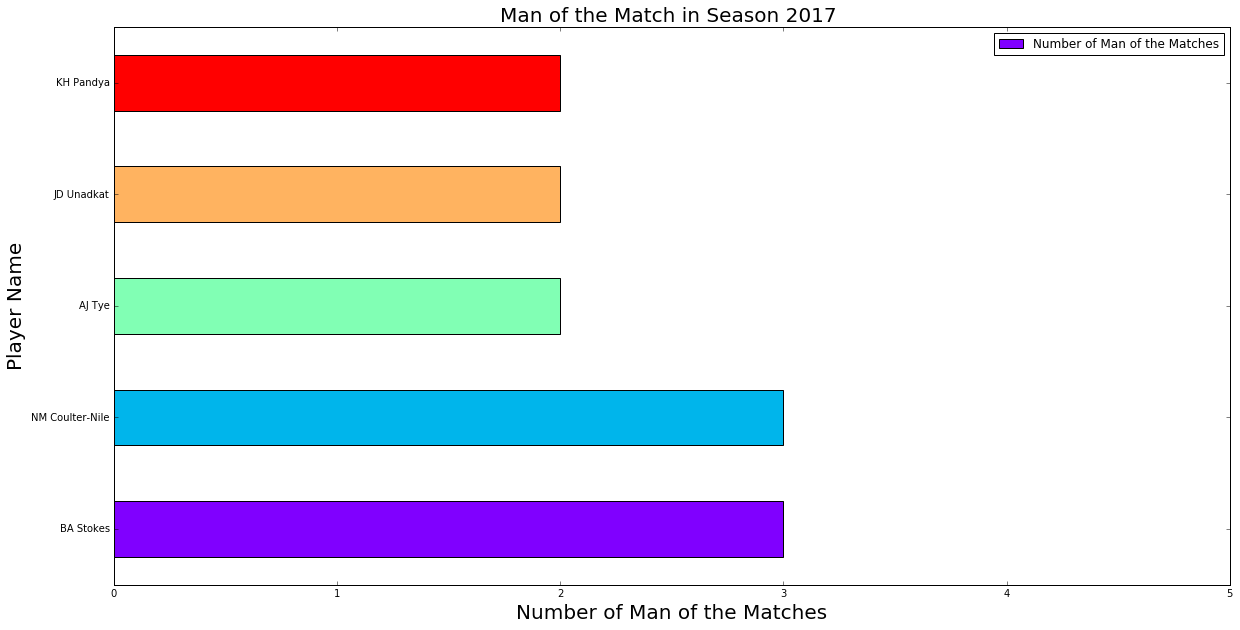

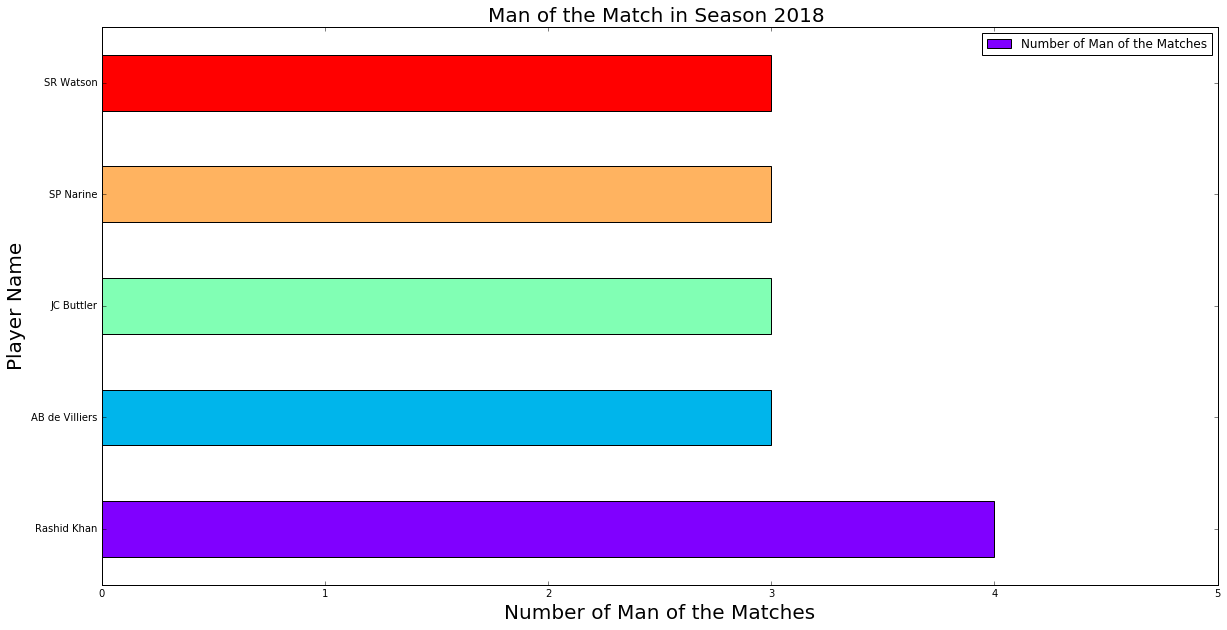

In [262]:
colors = cm.rainbow(np.linspace(0,1,5))

for title,group in every_season.groupby('Season'):
    group[0:5].plot(x = 'Player Name',y = 'Number of Man of the Matches',kind = 'barh',title = title,color = colors)
    plt.xlabel('Number of Man of the Matches',fontsize = 20)
    plt.ylabel('Player Name',fontsize = 20)
    plt.title('Man of the Match in Season %s '%title,fontsize = 20)
    plt.xlim([0,5])
plt.show()